# Lecture7　回帰分析2
<div dir='rtl'>
2024.4岩政
</div>


## 重回帰分析
2つの説明変数と関係しない変数の誤ったモデル

In [ ]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.formula.api as smf

from mpl_toolkits.mplot3d import Axes3D # for 3D-graph, 明示的には使わないが、インポートしておく必要がある
import seaborn as sns
np.random.seed(123) #再現性を得るため

## F検定の値を見る
真のシステム：y = b1*x1 + b2*x2 + noise  
モデル:　y = b1*x1 + b2*x2

In [ ]:
num = 30
noise = np.random.normal(0.0, 0.1, num)
rad = np.linspace(-np.pi,np.pi,num)
x1 = np.sin(rad)
x2 = np.random.normal(-2.0, 3.0, num)

In [ ]:
b1, b2 = 1.1, -0.55 # beta_0, beta_1
y = b1*x1 + b2*x2 + noise
df = pd.DataFrame({'y':y, 'x1':x1, 'x2':x2})
sns_plot = sns.pairplot(df,  diag_kind='hist')

In [ ]:

results = smf.ols('y ~ x1 + x2 -1', data=df).fit()
results.summary()

In [ ]:
plt.scatter(y,results.predict())

In [ ]:
b1, b2 = 0.0001, -0.000055
y = b1*x1 + b2*x2 + noise
df = pd.DataFrame({'y':y, 'x1':x1, 'x2':x2})
sns_plot = sns.pairplot(df,  diag_kind='hist')

In [ ]:
results = smf.ols('y ~ x1 + x2 -1', data=df).fit()
results.summary()

In [ ]:
plt.scatter(y,results.predict())

## 多重共線性（multicollinearity）の影響を見る

In [ ]:
num = 30
rad = np.linspace(-np.pi, np.pi, num)
x1 = np.sin(rad)
x2 = np.random.normal(-2.0, 3.0, num)

b1, b2 = 3.3, -1.25
noise = 0.001*np.random.normal( 0.0, 1.0, num)
y = b1*x1 + b2*x2 + noise

関係のないx3を測定したと仮定する

In [ ]:
x3 = 3.35*np.sin((rad+0.001))+ 0.001*np.random.normal( 0.0, 1.0, num)
df = pd.DataFrame({'y':y, 'x1':x1, 'x2':x2, 'x3':x3})

In [ ]:
sns_plot = sns.pairplot(df,  diag_kind='hist')

In [ ]:
results = smf.ols('y ~ x1 + x2 + x3 -1', data=df).fit()
results.summary()

"The condition number is large"というWarningメッセージが出た場合。<br>
condition number（条件数）は、行列の固有値から計算される数値であり、この値が大きいほど連立方程式が解きにくくなり、<br>
解に誤差を含む可能性が高いことを示唆する。したがって、出力された数値解は、盲目的に信じることなく、注意して見守る必要がある。

#### モデル次数をシステムに合わせる

In [ ]:
results = smf.ols('y ~ x1 + x2 -1', data=df).fit()
results.summary()

#### ３Dプロット，
参照　https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 軸ラベルの設定
ax.set_xlabel("x1-axis")
ax.set_ylabel("x2-axis")
ax.set_zlabel("y-axis")

# 表示範囲の設定
ax.set_xlim(-5, 5)
ax.set_ylim(-4, 4)
ax.set_zlim(-6, 10)

#観測データのプロット
ax.scatter(x1, x2, y, s=10, color='green')

# モデル式の表示
xx1 = np.linspace(-5,5,num)
xx2 = np.linspace(-4,4,num)

c1, c2 = results.params

y0 = c1*xx1 + c2*xx2
ax.plot(xx1, xx2, y0, color='black', linestyle='dashed')
plt.show()

## 電力と気温

In [ ]:

url = 'https://sites.google.com/site/datasciencehiro/datasets/ElectricPower.csv'
#url = 'datasets/ElectricPower.csv'
df_pow = pd.read_csv(url, comment='#', 
                    index_col='DATE', parse_dates=['DATE'],  
                     encoding='SHIFT-JIS' )
df_pow.head()

In [ ]:
df_pow.tail()

#### ダウンサンプリング
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html  
時間軸を日単位として，最大電力だけとする

In [ ]:
df_pow2 = df_pow.resample('D').max() # Dayへのダウンサンプリングと最大電力

In [ ]:
print(df_pow2.head())
print(df_pow2.shape)

#### 最高気温，最低気温のデータ読込み

In [ ]:
df = pd.read_csv('https://sites.google.com/site/datasciencehiro/datasets/AirTemperature.csv', comment='#', 
                    index_col='Date', parse_dates=['Date'],  
                     encoding='SHIFT-JIS' )
print(df.head())
print(df.shape)

#### データの結合

In [ ]:
df['MaxPower'] = df_pow2.Power

In [ ]:
df

In [ ]:
result = smf.ols('MaxPower ~ MaxTemp + MinTemp', data=df).fit()
print(result.summary())

In [ ]:
FLAG_fig=True
df.MaxPower.plot()
plt.legend()


In [ ]:
df.MaxTemp.plot()
df.MinTemp.plot()
plt.legend()


In [ ]:
df1 = df['2017/1/15':'2017/4/30']
df2 = df['2017/5/1':'2017/8/31']

In [ ]:
result1 = smf.ols('MaxPower ~ MaxTemp + MinTemp', data=df1).fit()
result1.summary()

In [ ]:
#予測
NewData = {'MaxTemp':[18.5, 14.0], 'MinTemp':[9.0, 6.5]}
NewDf = pd.DataFrame(NewData)
NewDf

In [ ]:
pred = result.predict(NewDf)
pred

In [ ]:
result2 = smf.ols('MaxPower ~ MaxTemp + MinTemp', data=df2).fit()
result2.summary()

## 一般化線形モデル　
### ロジスティック回帰モデル
対象：Spector and Mazzeo (1980) - Program Effectiveness Data <br>
http://www.statsmodels.org/dev/datasets/generated/spector.html

橋本本5.5.5ロジスティック回帰モデルに出てきた例

PSIが成績アップに有効化を検証する例

- GPA：前期の成績(0～4)
- TUCE:統一テストの結果
- PSI:ある教育プログラムを受けた(1)、受けない(0)
- GRADE: 成績が上がった(1)、上がっていない(0)

In [ ]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

#import seaborn as sns

np.random.seed(123)

In [ ]:
data = sm.datasets.spector.load().data
df = pd.DataFrame(data)
print(df.head())

ロジスティック回帰は，リンク関数にLogit() を用いる一般化回帰モデル(GLM)の一種であるので，以下のようにも書くことができる
https://qiita.com/TomokIshii/items/374ac7d4231adf6a39f4

In [ ]:
glm_model = 'GRADE ~ GPA + TUCE + PSI'
#fit = smf.glm(formula=glm_model, data=df, family=sm.families.Binomial(link=sm.families.links.logit))
fit = smf.glm(formula=glm_model, data=df, family=sm.families.Binomial())
result = fit.fit()
result.summary()

sm.GLM() で family オプションをつけて使用する分布がBinomial となる指示をする．これで，リンク関数は(Binomialのディフォルトの) logit() を使う処理となる．出力される summary() は次の通り

In [ ]:
df.corr()

念のため，縦軸にGRADEをとり，横軸にGPA,色でPSI=1,0を区別したグラフから何かを言えるかを確かめてみた。　 しかし，あまり，有意な特徴を見出すことはできない。

In [ ]:
plt.scatter(df.GPA[df.PSI==1.0], df.GRADE[df.PSI == 1.0] ,c = "red", label = "PSI=1")
plt.scatter(df.GPA[df.PSI==0.0], df.GRADE[df.PSI == 0.0] ,c = "blue", label = "PSI=0")

plt.xlabel('GPA')
plt.ylabel('GRADE')
#plt.title('Red:PSI=1,  Blue:PSI=0')
plt.legend(loc='center left')

## 一般化線形モデル　
### ポアソン回帰モデル

Ref. 
 Possion GLM, https://onlinecourses.science.psu.edu/stat504/node/169  
 
$\lambda = \exp(\beta_0+ \beta_1)$

In [ ]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(123)

#### ポアソン分布に従う確率変数ｙのデータ生成
$\lambda = \exp(\beta_0), \hspace{3mm} \beta_1 = 0$ の場合  
平均値をlamとおいた

In [ ]:
Num = 1000
lam = 5 # lambda
y = np.random.poisson(lam,Num)

In [ ]:
count, bins, ignored = plt.hist(y, 14, density=False)

if FLAG_fig: plt.savefig('fig_REG_GLM_Poisson1_hist.png')

#### 一部をプロット

In [ ]:
n = 100
plt.plot( y[0:n])


一般化線形モデル問題を解く

In [ ]:
x = range(len(y))
df = pd.DataFrame({'x':x, 'y':y})

In [ ]:
glm_model = 'y ~ x'
result = smf.glm(formula=glm_model, data=df, family=sm.families.Poisson()).fit()
print(result.summary())

In [ ]:
b0, b1 = result.params
print('exp(b0) =',np.exp(b0))

In [ ]:
print('Mean of y =',df.y.mean())

#### ポアソン分布に従う確率変数ｙのデータ生成
$\lambda = \exp(\beta_0 + \beta_1 x1)$, の場合  

In [ ]:
Num = 1000
x = np.zeros(Num)
y = np.zeros(Num)

In [ ]:
b0 , b1 = 0.5, 3.5
for i in range(Num):
    x[i] = i
    lam = np.exp( b0 + (b1/float(Num)) * (float(i)))
    y[i] = np.random.poisson(lam,1)

In [ ]:
count, bins, ignored = plt.hist(y, 14, density=False)


In [ ]:
plt.scatter(x, y)
plt.title("Poisson Distribution")

In [ ]:
df = pd.DataFrame({'x':x, 'y':y})
glm_model = 'y ~ x'
result = smf.glm(formula=glm_model, data=df, family=sm.families.Poisson()).fit()
print(result.summary())

下記で　b1 = b1 * num としているのは，glmはlamの生成式にある(b1/float(num))を予測しており，この分母を払うため

In [ ]:
b0, b1 = result.params
b1 = b1 * Num  # 見掛け上のパラメータの分母に(num)があるため，これを払う
print("b0 = %f  b1 = %f" % (b0,b1))

In [ ]:
y_pre = np.exp(b0 + (b1/float(Num))*x)
plt.scatter(x[0:Num], y[0:Num])
plt.plot(x, y_pre, color = 'white')


#### データの前半500個[0:499]と後半500個[500:999]を入れ替える

In [ ]:
nlen = len(x)
n2 = int(nlen/2)

xx = np.zeros(nlen)  # この1行は，いわゆる copy.deepcopy() ( import copy )の意味のメモリ確保
if nlen % 2 == 0: #even
    nst = n2
else:
    nst = n2 + 1
    xx[n2] = x[n2]
    
xx[0:n2] = x[nst:nlen]
xx[nst:nlen]= x[0:n2]
"""
print(xx[0:5])
print(xx[(n2-1):(n2+4)])
print(xx[-5:])
"""
yy = np.zeros(nlen)  # この1行は，いわゆる copy.deepcopy() ( import copy )の意味のメモリ確保
yy[0:n2] = y[nst:nlen]
yy[nst:nlen]= y[0:n2]

plt.plot(yy[0:nlen]) # 注意：plot(xx,yy)とすると，先のグラフと同じになる



In [ ]:
df = pd.DataFrame({'x':xx, 'y':yy})
glm_model = 'y ~ x'
result = smf.glm(formula=glm_model, data=df, family=sm.families.Poisson()).fit()
print(result.summary())

## ロジスティック回帰の例
 薬品とカブトムシの生存率
原著：Annette J. Dobson and Adrian G. Barnett, An Introduction to Generalized Linear Models, 3rd ed. , CRCPress 2008, p.127  
https://reneues.files.wordpress.com/2010/01/an-introduction-to-generalized-linear-models-second-edition-dobson.pdf


In [ ]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf


x:投薬量，n:カブトムシの総数，y:死亡数

In [ ]:
df = pd.DataFrame({'x':[1.6907, 1.7242, 1.7552, 1.7842, 1.8113, 1.8369, 1.861, 1.8839],
                   'n':[59, 60, 62, 56, 63, 59, 62, 60],
                   'y':[ 6, 13, 18, 28, 52, 53, 61, 60]})
print(df)

In [ ]:
plt.plot(df.x,df.y/df.n,label="y/n",linestyle='None', marker='o')
plt.title('beetle Survival rate')
plt.legend()


生存(n-y)とそうでない（y）という表現の場合，n-yが生存であることを利用して，<br>
glm_model = 'y + I(n-y) ~ x' <br>
という表現を用いる。I()内の'-'は算術減算を表す。I()が無いと，かっこ内の'-’はPatsyの表記と見なされ'-y'はyを除去することとなる。

In [ ]:
glm_model = 'y + I(n-y) ~ x'
result = smf.glm(formula=glm_model, data=df, family=sm.families.Binomial()).fit()
print(result.summary())

In [ ]:
b0 , b1 = result.params
#x = np.arange(df.x.min(), df.x.max(), 0.1)
xx = np.arange(1.5, 2.0, 0.01)
#p = 1.0 /( 1.0 + np.exp( -(b0 + b1*xx ))) 
p = result.predict(exog = pd.DataFrame({'x': xx}))
plt.plot(xx,p)
plt.plot(df.x,df.y/df.n,label="y/n",linestyle='None', marker='o')

plt.xlabel('z')
plt.ylabel('p')


## ポアソン回帰の例
ある病院の入院日数のデータセットを用いてPoisson回帰を解説する． 従属変数であるlos（入院日数：length of stay)を，性別(gender)，救急か否か(type1)，75歳以上か(age75)から予測する．

入院日数は負の値をとらない，いわゆるカウントデータであるので，Poisson回帰を適用する．

In [7]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

hospital = pd.read_csv("http://logopt.com/data/hospital-stay.csv",index_col=0)
hospital.head()

,los,gender,type1,age75
1,53,0,1,0
2,30,0,1,0
3,28,0,1,1
4,22,0,1,0
5,25,0,1,0


In [10]:
model = smf.glm(formula="los ~ C(gender) + C(type1) + age75 ", data=hospital, family= sm.families.Poisson() )
res = model.fit()
print(res.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            9178.5450  
Link Function:      Log              BIC:            -10080.9611
Dependent Variable: los              Log-Likelihood: -4585.3    
Date:               2022-04-23 11:12 LL-Null:        -4975.9    
No. Observations:   1798             Deviance:       3364.0     
Df Model:           3                Pearson chi2:   4.16e+03   
Df Residuals:       1794             Scale:          1.0000     
Method:             IRLS                                        
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------
Intercept         1.1822   0.0276 42.8441 0.0000  1.1282  1.2363
C(gender)[T.1]   -0.1475   0.0218 -6.7523 0.0000 -0.1903 -0.1047
C(type1)[T.1]     0.6280   0.0258 24.3094 0.0000  0.5774  0.6787
age75             0.1298   0.0232  5.6016

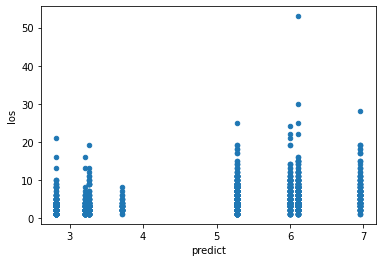

In [14]:
hospital['predict'] = res.predict() #予測を行い，結果を'predict'列に追加
hospital.plot.scatter(x='predict',y='los'); #描画

得られた結果

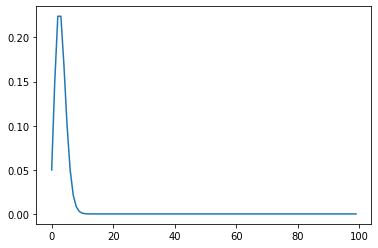

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import poisson
import numpy as np

k = np.arange(0,100)

lamb = np.exp(hospital['predict'] [8])
lamb=3
p = poisson.pmf(k, lamb)
plt.plot(k, p, label='lamb='+str(lamb))

#plt.legend()

(array([434., 155.,  46.,   0.,   0., 512.,   0., 506.,   0., 145.]),
 array([2.81449548, 3.22896137, 3.64342725, 4.05789314, 4.47235903,
        4.88682491, 5.3012908 , 5.71575669, 6.13022257, 6.54468846,
        6.95915434]),
 <BarContainer object of 10 artists>)

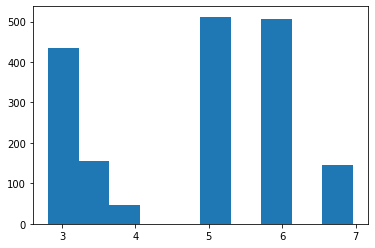

In [52]:
plt.hist(hospital['predict'])

# 線形回帰(OLS)は一般化線形モデルの一部である件

In [1]:
import pandas as pd
%matplotlib inline
diamond = pd.read_csv('http://logopt.com/data/Diamond.csv', index_col=0)
diamond.head()

,carat,colour,clarity,certification,price
1,0.30,D,VS2,GIA,1302
2,0.30,E,VS1,GIA,1510
3,0.30,G,VVS1,GIA,1510
4,0.30,G,VS1,GIA,1260
5,0.31,D,VS1,GIA,1641


glmを何も確率関数族を指定しないと、正規分布を指定したことになる

In [2]:
import statsmodels.formula.api as smf
model = smf.glm('price ~ carat + colour + clarity +certification', diamond) 
fit = model.fit()                                
print(fit.summary2()) 

                      Results: Generalized linear model
Model:                   GLM                 AIC:               4931.3248     
Link Function:           identity            BIC:               148870958.0331
Dependent Variable:      price               Log-Likelihood:    -2452.7       
Date:                    2022-04-23 11:04    LL-Null:           -5827.9       
No. Observations:        308                 Deviance:          1.4887e+08    
Df Model:                12                  Pearson chi2:      1.49e+08      
Df Residuals:            295                 Scale:             5.0465e+05    
Method:                  IRLS                                                 
------------------------------------------------------------------------------
                       Coef.    Std.Err.    z     P>|z|    [0.025     0.975]  
------------------------------------------------------------------------------
Intercept              169.1760 255.0156   0.6634 0.5071  -330.6454   668.9

- No. Observations : サンプル数 (=308)
- Df Model : 自由度(Degree of Freedom) 変数の数なので  12 
- AIC : 赤池情報量基準(Akaike Information Criterion) ( =4931.3248=−2×対数尤度+2×(自由度+1)=−2×(−2452.7)+2×(12+1)  )　(小さいほどモデルの適合度が良い）
- Log-Likelihood: 尤度の対数（最大尤度のものを求めている）最尤推定
- Corf. : 係数（一番上のInterceptはy切片）
- Std. Err. : 標準誤差
- z : 標準偏差．大きいほど係数が信頼できる
- P : P値（偶然|z|を超える確率）．小さいほど係数が信頼できる（以下の表参照）
- [0.025, 0.975] : 係数の信頼区間

## カテゴリ変数を認識してくれている
'colour[T.E]'などのように、カテゴリ変数として認識されていることがわかる。

明示的に'C()'でカテゴリ変数であることを指定しても結果は同じ

In [3]:
model2 = smf.glm('price ~ carat + C(colour) + C(clarity) +C(certification)', diamond) 
fit2 = model2.fit()                                
print(fit2.summary2())  

                        Results: Generalized linear model
Model:                    GLM                  AIC:                4931.3248     
Link Function:            identity             BIC:                148870958.0331
Dependent Variable:       price                Log-Likelihood:     -2452.7       
Date:                     2022-04-23 11:06     LL-Null:            -5827.9       
No. Observations:         308                  Deviance:           1.4887e+08    
Df Model:                 12                   Pearson chi2:       1.49e+08      
Df Residuals:             295                  Scale:              5.0465e+05    
Method:                   IRLS                                                   
---------------------------------------------------------------------------------
                          Coef.    Std.Err.    z     P>|z|    [0.025     0.975]  
---------------------------------------------------------------------------------
Intercept                 169.1760 255.0

### 線形回帰が一般化線形モデルの一部である

In [4]:
results = smf.ols('price ~ carat + colour + clarity +certification', data=diamond).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     562.5
Date:                Sat, 23 Apr 2022   Prob (F-statistic):          2.82e-195
Time:                        11:07:42   Log-Likelihood:                -2452.7
No. Observations:                 308   AIC:                             4931.
Df Residuals:                     295   BIC:                             4980.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              169.1760    255.016      0.663      0.508    -332.704     671.056
colour[T.E]          -1439.0853    207.982     -6.919      0.000   -1848.401   -1029.770
colour[T.F]          -1841.6905    195.232     -9.433      0.000   -2225.914   -1457.467
colour[T.G]          -2176.6722    200.393    -10.862      0.000   -2571.054   -1782.290
colour[T.H]          -2747.1500    202.914    -13.538      0.000   -3146.492   -2347.808
colour[T.I]          -3313.1024    212.715    -15.575      0.000   -3731.733   -2894.472
clarity[T.VS1]       -1474.5661    159.675     -9.235      0.000   -1788.813   -1160.320
clarity[T.VS2]       -1792.0109    171.185    -10.468      0.000   -2128.910   -1455.111
clarity[T.VVS1]       -689.2904    159.925     -4.310      0.000   -1004.029    -374.552
clarity[T.VVS2]      -1191.1643    148.758     -8.007      0.000   -1483.926    -898.403
certification[T.HRD]    15.2267    107.247      0.142      0.887    -195.840     226.294
certification[T.IGI]   141.2624    128.258      1.101      0.272    -111.155     393.680
carat                 1.277e+04    190.024     67.183      0.000    1.24e+04    1.31e+04
==============================================================================
Omnibus:                      124.131   Durbin-Watson:                   1.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              547.121
Skew:                           1.667   Prob(JB):                    1.56e-119
Kurtosis:                       8.614   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

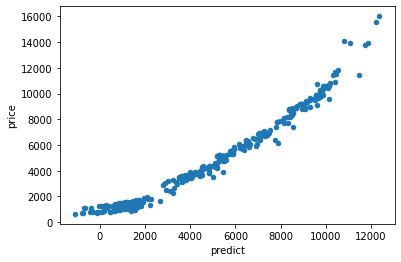

In [5]:
diamond['predict'] = fit.predict() #予測を行い，結果を'predict'列に追加
diamond.plot.scatter(x='predict',y='price'); #描画

In [ ]:
## 